In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("3-15.xlsx")
X=df.iloc[:,1]
y=df.iloc[:,2]
oldX=X
oldY=y
xmean=X.mean()
ymean=y.mean()
xsd=X.std()*np.sqrt(52)
ysd=y.std()*np.sqrt(52)
# X=(X-xmean)/xsd
# y=(y-ymean)/ysd

In [11]:
import statsmodels.api as sm
X=sm.add_constant(X)
ols=sm.OLS(y,X)

In [12]:
models=ols.fit()
models.params

const   -0.788008
X        0.003619
dtype: float64

In [13]:
y_predict=models.predict()
outliers=models.get_influence()

In [14]:
y-y_predict

0    -0.879034
1     0.171371
2    -2.314033
3    -0.205971
4     1.381972
5     0.244886
6     1.910246
7     2.366853
8     2.158384
9     0.118520
10    0.049360
11   -0.153643
12    1.334900
13   -2.127787
14   -1.997381
15   -0.210100
16   -0.322983
17   -1.949349
18   -1.137862
19    0.603909
20   -0.606046
21   -0.814664
22    0.484480
23   -2.295550
24    2.218789
25   -4.091090
26    1.959225
27   -0.657336
28   -2.357682
29    3.200621
30   -1.123358
31   -0.652276
32    0.039119
33    0.597289
34    1.488970
35   -0.377412
36   -0.258328
37    2.268128
38    1.804165
39   -1.110700
40    1.244630
41   -0.241151
42   -0.466316
43    0.546957
44    0.179901
45   -0.265505
46   -1.343133
47   -0.196481
48    2.651538
49    2.845728
50    0.488174
51   -3.398943
52   -0.804003
Name: Y, dtype: float64

Text(0, 0.5, '$\\hat{r_i}$')

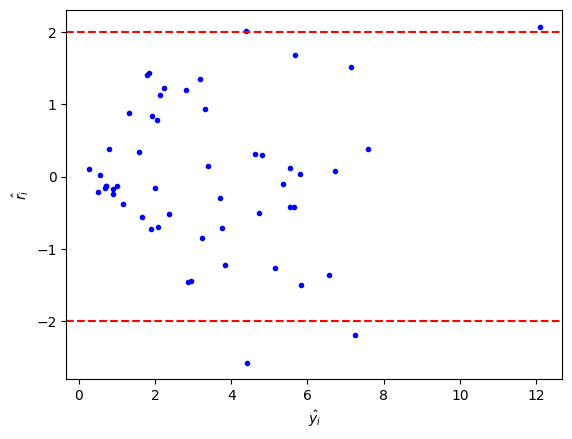

In [15]:
ri=outliers.resid_studentized_internal
plt.plot(y_predict,ri,'b.')
plt.axhline(y=2,color="r",linestyle="--")
plt.axhline(y=-2,color="r",linestyle="--")
plt.xlabel("$\hat{y_i}$")
plt.ylabel("$\hat{r_i}$")

In [7]:
import numpy as np
X=df.iloc[:,1]
y=df.iloc[:,2]
u=np.sqrt(y)
import statsmodels.api as sm
X=sm.add_constant(X)
ols=sm.OLS(u,X)
models=ols.fit()
models.params

const    0.589569
X        0.000940
dtype: float64

Text(0, 0.5, '$\\hat{r_i}$')

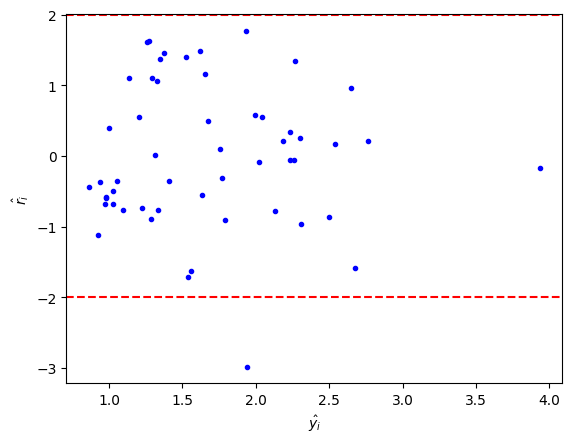

In [8]:
u_predict=models.predict()
outliers=models.get_influence()
ri=outliers.resid_studentized_internal
plt.plot(u_predict,ri,'b.')
plt.axhline(y=2,color="r",linestyle="--")
plt.axhline(y=-2,color="r",linestyle="--")
plt.xlabel("$\hat{y_i}$")
plt.ylabel("$\hat{r_i}$")

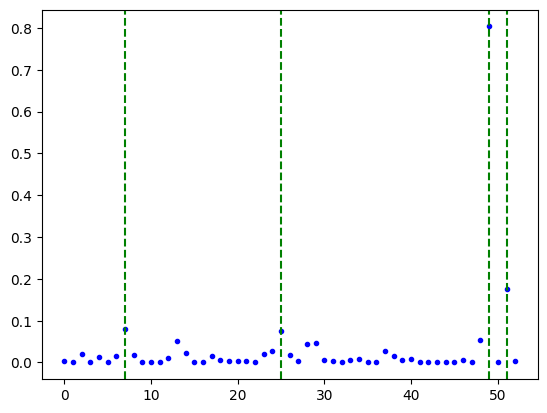

In [39]:
cook=outliers.cooks_distance
plt.plot(cook[0],'b.')
plt.axvline(x=7,color="g",linestyle="--")
plt.axvline(x=25,color="g",linestyle="--")
plt.axvline(x=49,color="g",linestyle="--")
plt.axvline(x=51,color="g",linestyle="--")

In [71]:
zou=np.array([0.004606011029245958,
 0.0003289539824687444,
 0.021362756298643443,
 0.0003413151577143285,
 0.013280811784765633,
 0.0002270248189660391,
 0.014715640671143016,
 0.08098911814277143,
 0.017810180372107968,
 0.0001700862870668317,
 1.92498388193169e-05,
 0.00015391522077802612,
 0.009589891882675207,
 0.05071241780627569,
 0.023781318529231623,
 0.0004046469225389769,
 0.0010556876763166746,
 0.01484611388019225,
 0.006988124992992074,
 0.0032292217393343862,
 0.0027351587497776385,
 0.003017399854281535,
 0.0012067830346717096,
 0.02079116207823807,
 0.0279881759781227,
 0.07487419971341527,
 0.018261220064887354,
 0.003043979056852114,
 0.044869122025598375,
 0.045518754237212807,
 0.0048793633545211965,
 0.0031425200123094007,
 1.5084305785723623e-05,
 0.006283326148190591,
 0.00841206249088853,
 0.0012041730711567036,
 0.0003474718400338798,
 0.02863922339780229,
 0.016083295143470615,
 0.006246533267175964,
 0.007920162219824587,
 0.0005401820958673635,
 0.0008362455770664626,
 0.0018425492246499353,
 0.00022725947144345817,
 0.0005910383148574641,
 0.0068655769810079025,
 0.00035447389534383543,
 0.05278704560972509,
 0.8037785634057767,
 0.0011483944629716138,
 0.17563785693847436,
 0.0032462911095182197])

In [72]:
ri[25]

-2.5712448061218613

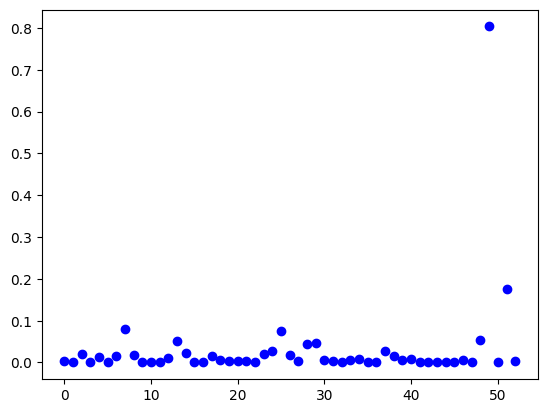

In [73]:
plt.plot(zou,'bo')

In [74]:
import scipy.stats as stats

In [75]:
yb,lam=stats.boxcox(y)

In [76]:
lam

0.27730251127015687

In [77]:
llf=[]
lam_r=np.linspace(0.001,1,1000)
for i,lam in enumerate(lam_r):
    llf.append(stats.boxcox_llf(lam,y))
lam_b=lam_r[np.array(llf).argmax()]

In [78]:
lam_b

0.277